In [1]:
import sys
sys.path.insert(1, '/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Code')
from functions import *
%matplotlib inline

/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
n_trials = 30
scan_length = 225
repetition_time = 1
mu_grinband_shift = 642.35
inv_lambda_grinband_shift = 689.75
sigma_grinband_shift = 104.80
#mu_expnorm = 530
#lam_expnorm = 1 / 160
#sigma_expnorm = 77
mu_expnorm = mu_grinband_shift
lam_expnorm = 1 / inv_lambda_grinband_shift
sigma_expnorm = sigma_grinband_shift
max_rt = 8000
min_rt = 50
event_duration = .5
beta_scales_yes = 0
beta_scales_no = 0
center_rt=True
hp_filter = True

ISI_min = 3
ISI_max = 6

nsim = 500
nsub = 10
win_sub_noise_sd_scales_yes = 2 
win_sub_noise_sd_scales_no = .5
btwn_sub_noise_sd_scales_yes = 7  # I think i'll go between 5-9?  With within sd = 2.5
btwn_sub_noise_sd_scales_no = 40

Scales yes between-subject SD = 0

Scales no between-subject SD = 0



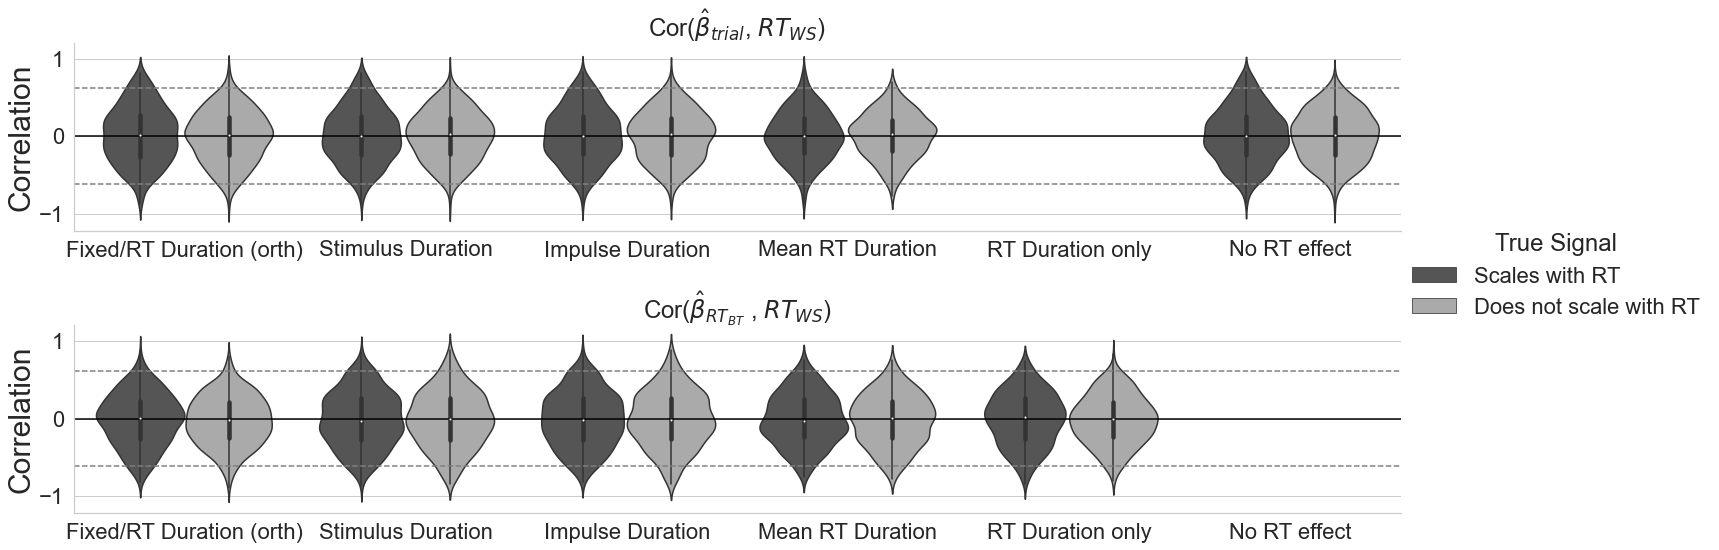

Scales yes between-subject SD = 5

Scales no between-subject SD = 30



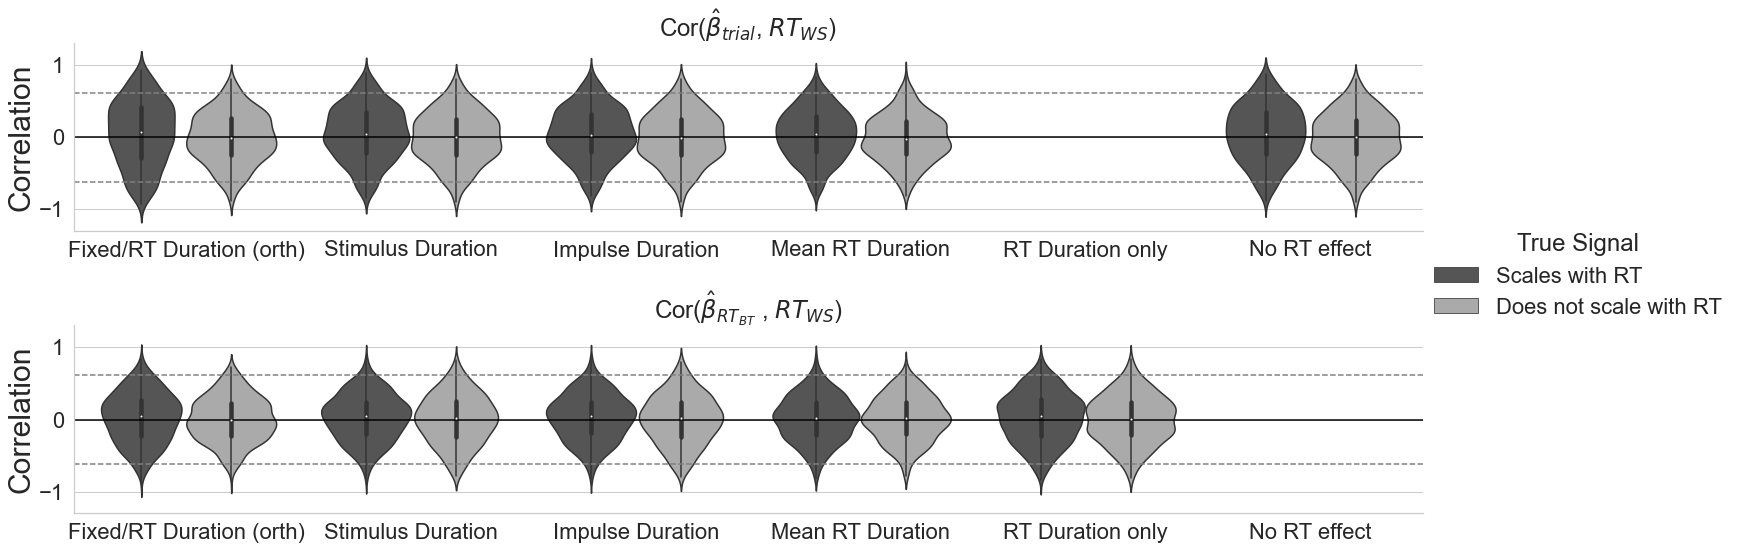

Scales yes between-subject SD = 7

Scales no between-subject SD = 50



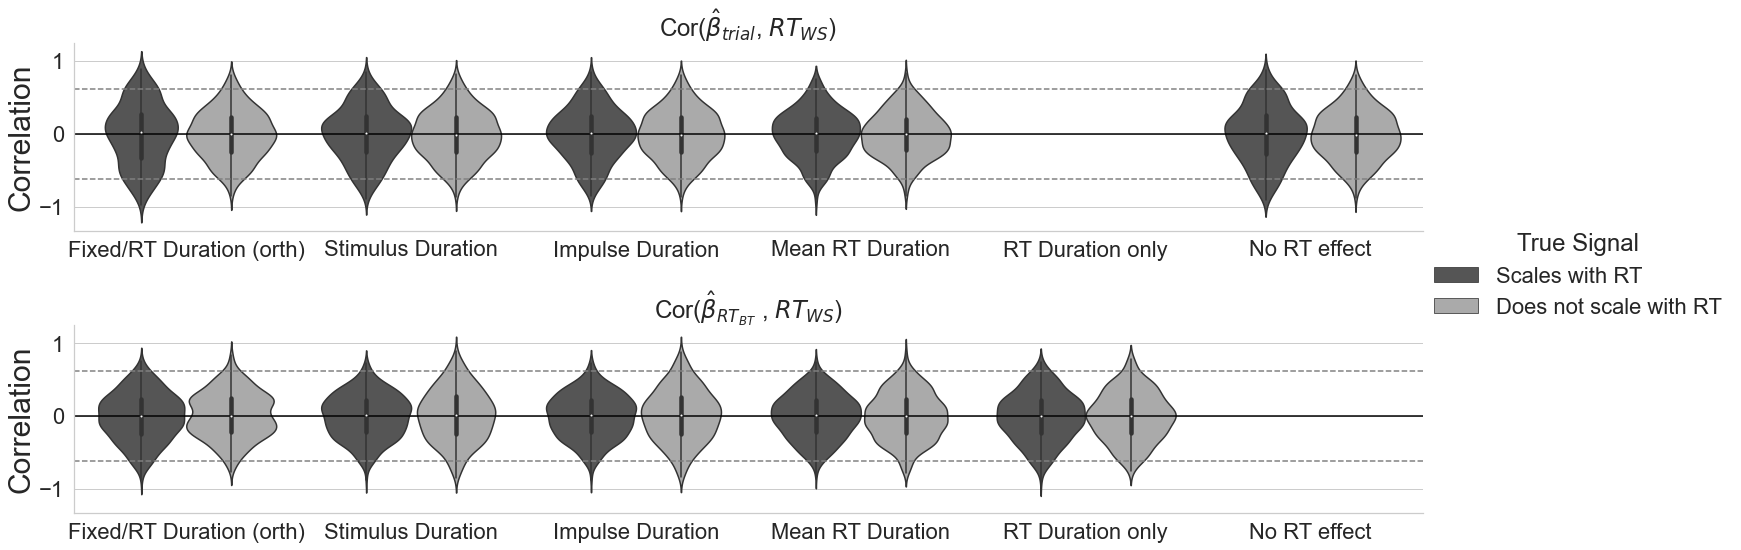

Scales yes between-subject SD = 10

Scales no between-subject SD = 60



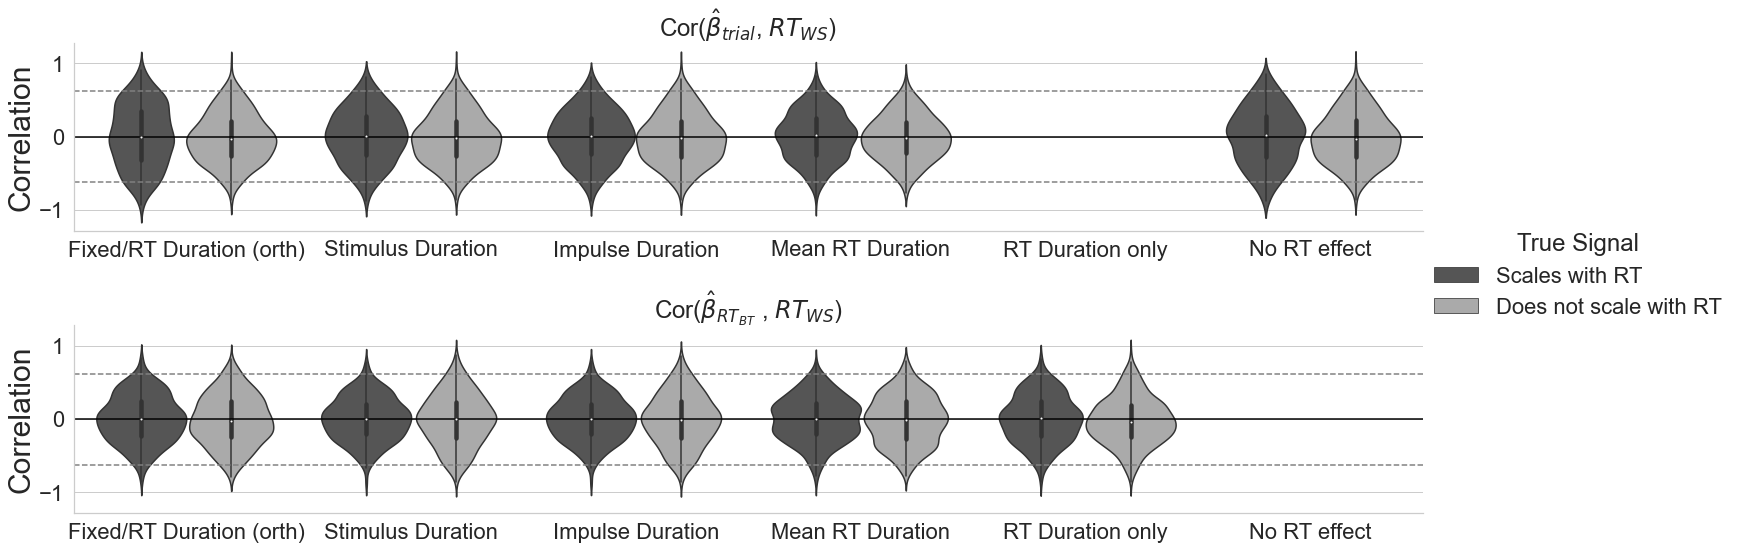

In [4]:
btwn_sub_noise_sd_vec_scales_yes = [0,  5,  7, 10]
btwn_sub_noise_sd_vec_scales_no = [0,  30,  50, 60]

unmod_1sampt_pow, rtmod_1sampt_pow = group_power_range_btwn_sd(n_trials, scan_length, repetition_time, 
              mu_expnorm, lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_scales_yes, win_sub_noise_sd_scales_no, 
              btwn_sub_noise_sd_vec_scales_yes, btwn_sub_noise_sd_vec_scales_no, nsub, nsim, 
              center_rt, beta_scales_yes, beta_scales_no, hp_filter)

In [5]:
out_est_win_sub_mod_sd = est_win_sub_mod_sd(n_trials, scan_length, repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, center_rt,
              hp_filter, nsim)
within_sd_scales_yes = (win_sub_noise_sd_scales_yes*
             out_est_win_sub_mod_sd['des_sd_rt_dur'])
mfx_sd_scales_yes = np.sqrt((win_sub_noise_sd_scales_yes*
             out_est_win_sub_mod_sd['des_sd_rt_dur'])**2 + \
             np.array(btwn_sub_noise_sd_vec_scales_yes)**2)
total_within_sd_ratio_scales_yes = mfx_sd_scales_yes/within_sd_scales_yes
print(total_within_sd_ratio_scales_yes)

within_sd_scales_no = (win_sub_noise_sd_scales_no*
             out_est_win_sub_mod_sd['des_sd_zero_dur'])
mfx_sd_scales_no = np.sqrt((win_sub_noise_sd_scales_no*
             out_est_win_sub_mod_sd['des_sd_zero_dur'])**2 + \
             np.array(btwn_sub_noise_sd_vec_scales_no)**2)
total_within_sd_ratio_scales_no = mfx_sd_scales_no/within_sd_scales_no
print(total_within_sd_ratio_scales_no)

[1.         3.95341944 5.44737271 7.71479754]
[1.         3.33929408 5.40341584 6.45008061]


Scales with RT


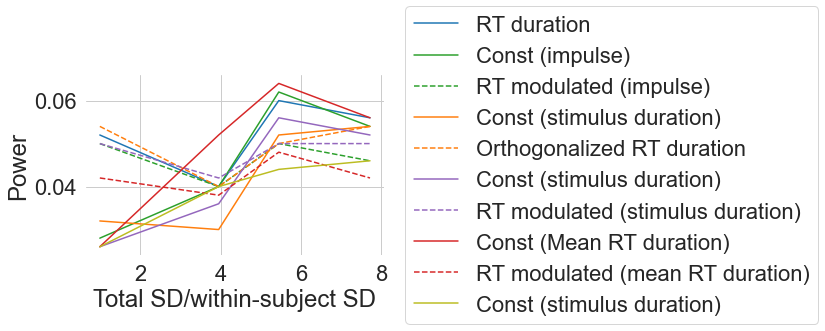

Does not scale with RT


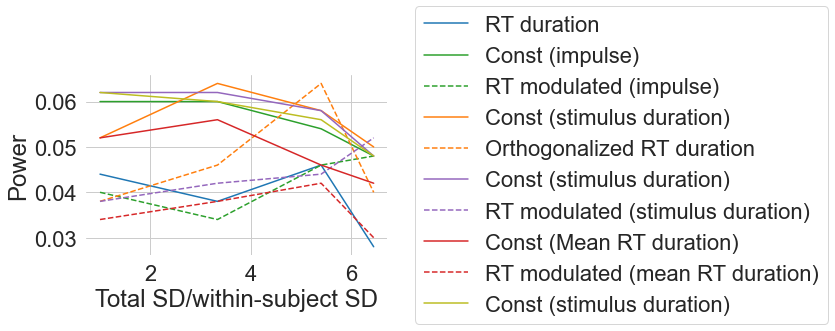

In [6]:
print('Scales with RT')
power_plot_group(unmod_1sampt_pow, rtmod_1sampt_pow, total_within_sd_ratio_scales_yes, sim_type='dv_scales_yes',
                    zoom=False)
print('Does not scale with RT')
power_plot_group(unmod_1sampt_pow, rtmod_1sampt_pow, total_within_sd_ratio_scales_no, sim_type='dv_scales_no',
                    zoom=False)